In [1]:
#Import the required packages with their customary aliases
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
with sns.color_palette("husl", 8):
    import gmplot
from shapely.geometry import Point
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import folium
from folium import plugins
from folium import Map, Marker, GeoJson
from geopandas import GeoDataFrame
pd.set_option('display.max_columns', 104)
sns.set(color_codes=True)
#Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time
%matplotlib inline

In [2]:
energy_consumption_combine_df5 = pd.read_csv('energy_consumption_combine_df5.csv')

In [3]:
energy_consumption_combine_df5.head()

year  month  zip_code customer_type  monthly_usage        lat        lng  \
0  2015.0      8   37204.0    commercial      6517747.0  36.109305 -86.776748   
1  2015.0      8   37242.0    commercial       398400.0  36.165017 -86.782171   
2  2015.0      8   37210.0    commercial     10749731.0  36.140869 -86.738847   
3  2015.0      8   37214.0    commercial      1656933.0  36.168995 -86.667231   
4  2015.0      8   37205.0    commercial      9106796.0  36.112469 -86.867263   

                               geometry  
0          POINT (-86.776748 36.109305)  
1  POINT (-86.78217100000001 36.165017)  
2  POINT (-86.73884700000001 36.140869)  
3          POINT (-86.667231 36.168995)  
4  POINT (-86.86726299999999 36.112469)

In [4]:
energy_consumption_combine_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 8 columns):
year             13454 non-null float64
month            13454 non-null int64
zip_code         13454 non-null float64
customer_type    13454 non-null object
monthly_usage    13454 non-null float64
lat              13454 non-null float64
lng              13454 non-null float64
geometry         13454 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 841.0+ KB


In [5]:
energy_consumption_combine_df5['customer_type'].value_counts()

commercial          7146
residential         3517
outdoor_lighting    2387
seasonal             404
Name: customer_type, dtype: int64

In [6]:
# Create a shapely Point from lat and lng
energy_consumption_combine_df5['geometry2'] = energy_consumption_combine_df5.apply(lambda x: Point((x.lng , x.lat)), axis = 1)

# Build a GeoDataFrame: permits_geo
energy_consumption_combine_df5_geo = gpd.GeoDataFrame(energy_consumption_combine_df5, crs = zip_code.crs, geometry = energy_consumption_combine_df5.geometry2)

# Spatial join of permits_geo and council_districts
permits_by_district = gpd.sjoin(energy_consumption_combine_df5_geo, council_districts, op = 'within')
print(permits_by_district.head(2))


NameError: name 'zip_code' is not defined

In [7]:
nash_zip_df = gpd.read_file('data/zip_codes/geo_export_50ee90c3-f27f-41cf-8c3e-c9a06a2acd0e.shp')

In [8]:
nash_zip_df.head()

objectid    po_name    shape_star     shape_stle    zip  \
0       1.0    MADISON  5.965534e+08  178783.024889  37115   
1       3.0  NASHVILLE  1.888847e+08   75820.997821  37216   
2       9.0  NASHVILLE  2.006648e+08   93180.292250  37204   
3      11.0  BRENTWOOD  1.749784e+08  159760.694293  37027   
4      18.0   FRANKLIN  4.696961e+07   28995.828321  37064   

                                            geometry  
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...  
1  POLYGON ((-86.73451 36.23774, -86.73425 36.237...  
2  POLYGON ((-86.77914 36.13424, -86.77923 36.133...  
3  POLYGON ((-86.81258 36.06319, -86.81263 36.063...  
4  POLYGON ((-87.02197 36.01200, -87.02140 36.011...

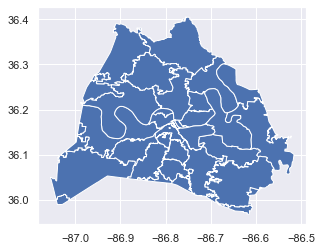

In [9]:
nash_zip_df.plot()

In [10]:
nash_zip_df.dtypes

objectid       float64
po_name         object
shape_star     float64
shape_stle     float64
zip             object
geometry      geometry
dtype: object

In [11]:
zip_code_agg = energy_consumption_combine_df5.groupby('zip_code').monthly_usage.sum().reset_index().rename({'zip_code': 'zip'},axis=1)
zip_code_agg.head()

zip  monthly_usage
0  37013.0   1.846243e+09
1  37015.0   6.621903e+07
2  37027.0   1.572475e+09
3  37064.0   5.297400e+05
4  37066.0   8.456530e+07

In [12]:
nash_zip_df[ 'zip'] = nash_zip_df.zip.astype('float64')

In [13]:
zip_code_agg = energy_consumption_combine_df5.groupby('zip_code').monthly_usage.sum().reset_index().rename({'zip_code': 'zip'},axis=1)
zip_code_agg.head()

zip  monthly_usage
0  37013.0   1.846243e+09
1  37015.0   6.621903e+07
2  37027.0   1.572475e+09
3  37064.0   5.297400e+05
4  37066.0   8.456530e+07

In [35]:
year_zip_code_agg = energy_consumption_combine_df5.groupby(['zip_code', 'year']).monthly_usage.sum().reset_index().rename({'zip_code': 'zip'},axis=1)
year_zip_code_agg.head(2)

zip    year  monthly_usage
0  37013.0  2012.0    261714846.0
1  37013.0  2013.0    239815208.0

In [14]:
zip_code_agg.dtypes

zip              float64
monthly_usage    float64
dtype: object

In [36]:
year_zip_code_agg.dtypes

zip              float64
year             float64
monthly_usage    float64
dtype: object

In [15]:
nash_zip_geo = nash_zip_df.merge(zip_code_agg, on='zip')

In [37]:
year_zip_geo = nash_zip_df.merge(year_zip_code_agg, on='zip')
year_zip_geo.head(2)

objectid  po_name    shape_star     shape_stle      zip  \
0       1.0  MADISON  5.965534e+08  178783.024889  37115.0   
1       1.0  MADISON  5.965534e+08  178783.024889  37115.0   

                                            geometry    year  monthly_usage  
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...  2012.0    216954741.0  
1  POLYGON ((-86.68725 36.31821, -86.68722 36.318...  2013.0    214252992.0

In [17]:
nash_zip_geo['area'] = nash_zip_geo.geometry.area

In [18]:
nash_zip_geo['energy_density'] = nash_zip_geo.apply(
    lambda row: row.monthly_usage/row.area, axis = 1)

nash_zip_geo.head(2)

objectid    po_name    shape_star     shape_stle      zip  \
0       1.0    MADISON  5.965534e+08  178783.024889  37115.0   
1       3.0  NASHVILLE  1.888847e+08   75820.997821  37216.0   

                                            geometry  monthly_usage      area  \
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...   1.461878e+09  0.005558   
1  POLYGON ((-86.73451 36.23774, -86.73425 36.237...   6.018543e+08  0.001759   

   energy_density  
0    2.630390e+11  
1    3.421826e+11

In [38]:
nash_zip_geo.head(2)

objectid    po_name    shape_star     shape_stle      zip  \
0       1.0    MADISON  5.965534e+08  178783.024889  37115.0   
1       3.0  NASHVILLE  1.888847e+08   75820.997821  37216.0   

                                            geometry  monthly_usage  \
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...   1.461878e+09   
1  POLYGON ((-86.73451 36.23774, -86.73425 36.237...   6.018543e+08   

        area  energy_density  
0  85.404945    2.630390e+11  
1  27.015486    3.421826e+11

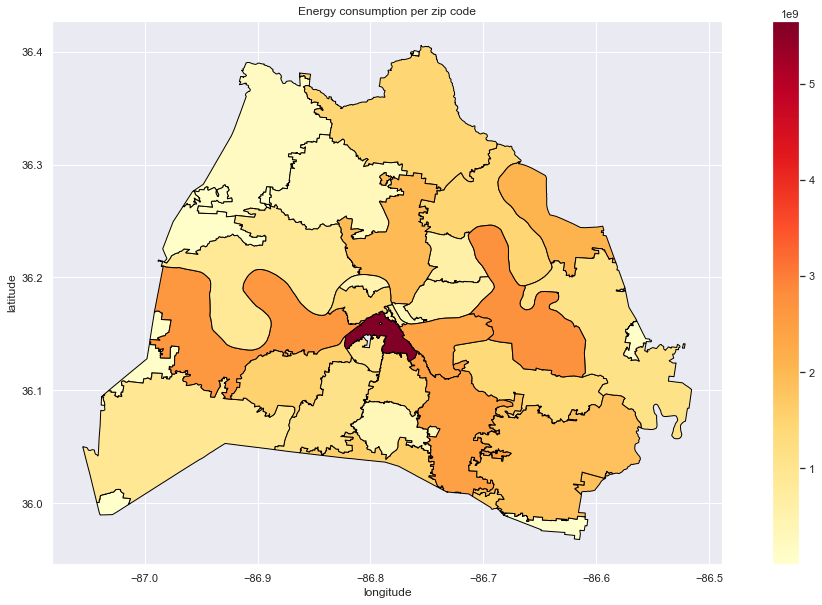

In [19]:
plt.rcParams['figure.figsize'] = (18,10)
nash_zip_geo.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('Energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [20]:
# starting CRS
print(nash_zip_geo.crs)

{'init': 'epsg:4326'}


In [21]:
# convert to EPSG 3857
nash_zip_geo = nash_zip_geo.to_crs(epsg = 3857)
print(nash_zip_geo.crs)

{'init': 'epsg:3857', 'no_defs': True}


In [22]:
# define a variable for m^2 to km^2
sqm_to_sqkm = 10**6

nash_zip_geo['area'] = nash_zip_geo.geometry.area / sqm_to_sqkm
nash_zip_geo.head(2)

objectid    po_name    shape_star     shape_stle      zip  \
0       1.0    MADISON  5.965534e+08  178783.024889  37115.0   
1       3.0  NASHVILLE  1.888847e+08   75820.997821  37216.0   

                                            geometry  monthly_usage  \
0  POLYGON ((-9649980.414 4344495.673, -9649976.7...   1.461878e+09   
1  POLYGON ((-9655241.695 4333382.848, -9655213.0...   6.018543e+08   

        area  energy_density  
0  85.404945    2.630390e+11  
1  27.015486    3.421826e+11

In [23]:
# change crs back to 4326
nash_zip_geo = nash_zip_geo.to_crs(epsg = 4326)
print(nash_zip_geo.crs)

{'init': 'epsg:4326', 'no_defs': True}


In [24]:
nash_zip_geo.head(2)

objectid    po_name    shape_star     shape_stle      zip  \
0       1.0    MADISON  5.965534e+08  178783.024889  37115.0   
1       3.0  NASHVILLE  1.888847e+08   75820.997821  37216.0   

                                            geometry  monthly_usage  \
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...   1.461878e+09   
1  POLYGON ((-86.73451 36.23774, -86.73425 36.237...   6.018543e+08   

        area  energy_density  
0  85.404945    2.630390e+11  
1  27.015486    3.421826e+11

In [39]:
# Create a DF for the year 2012
year_2012 = year_zip_geo.loc[year_zip_geo.year == 2012]


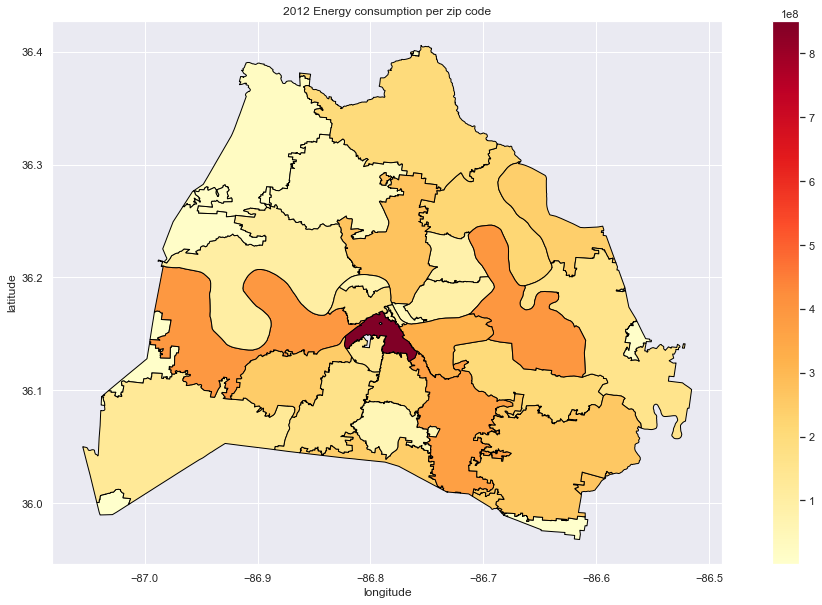

In [46]:
plt.rcParams['figure.figsize'] = (18,10)
year_2012.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('2012 Energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [40]:
# Create a DF for the year 2013
year_2013 = year_zip_geo.loc[year_zip_geo.year == 2013]

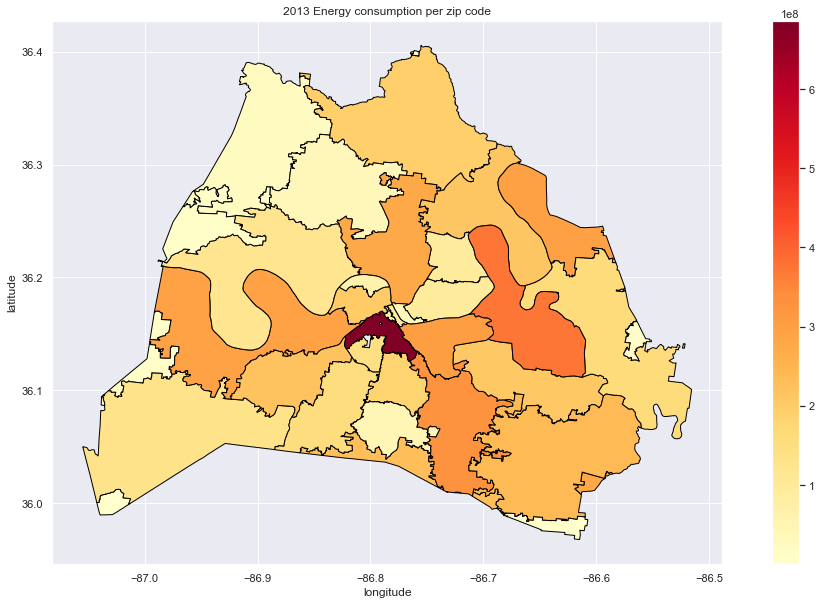

In [47]:
plt.rcParams['figure.figsize'] = (18,10)
year_2013.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('2013 Energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [41]:
# Create a DF for the year 2014
year_2014 = year_zip_geo.loc[year_zip_geo.year == 2014]

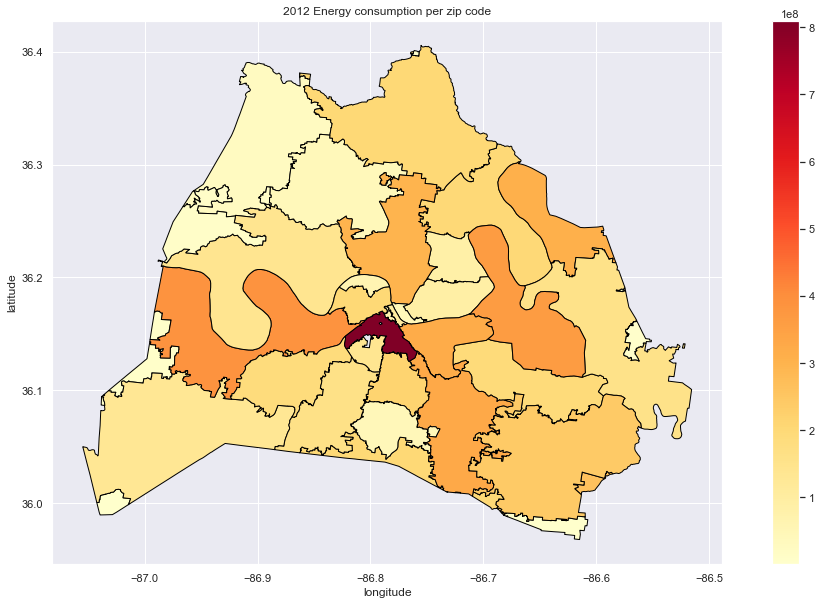

In [48]:
plt.rcParams['figure.figsize'] = (18,10)
year_2014.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('2012 Energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [42]:
# Create a DF for the year 2015
year_2015 = year_zip_geo.loc[year_zip_geo.year == 2015]

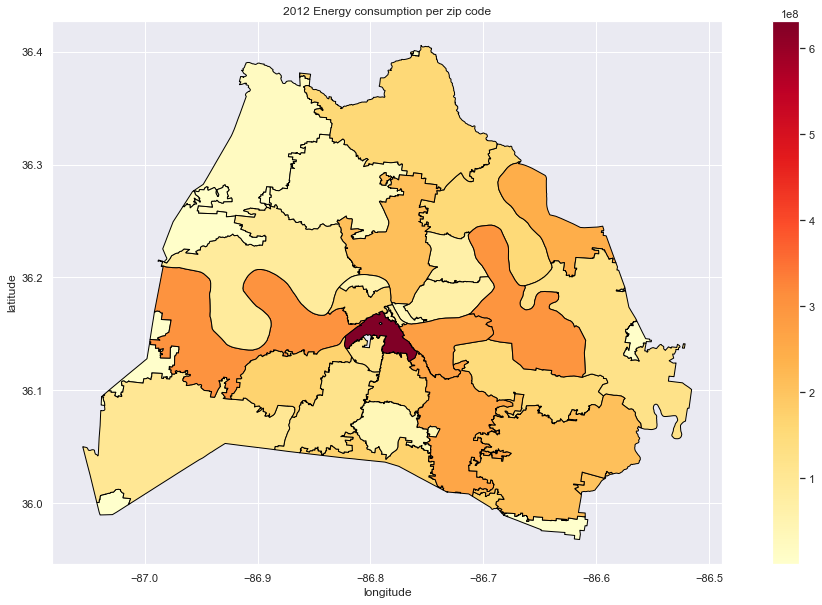

In [49]:
plt.rcParams['figure.figsize'] = (18,10)
year_2016.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('2012 Energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [43]:
# Create a DF for the year 2016
year_2016 = year_zip_geo.loc[year_zip_geo.year == 2016]

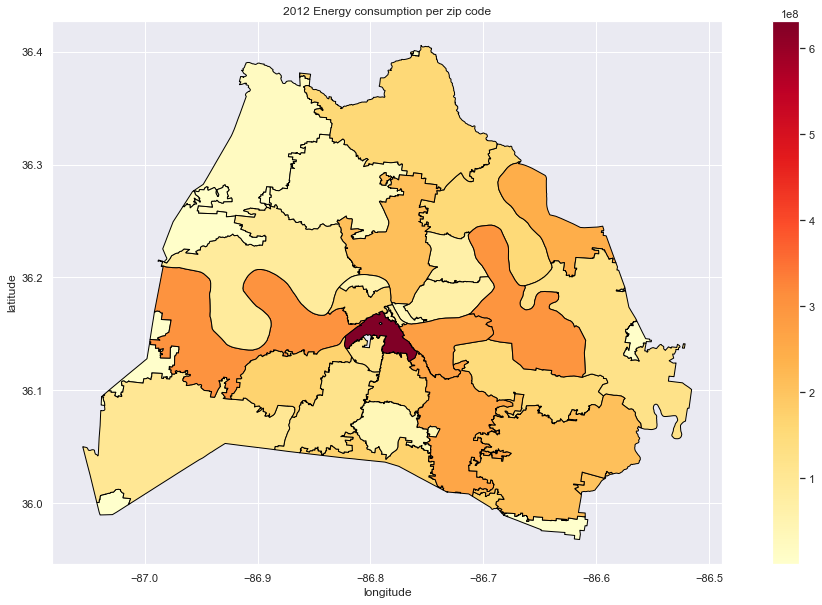

In [50]:
plt.rcParams['figure.figsize'] = (18,10)
year_2016.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('2012 Energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [44]:
# Create a DF for the year 2017
year_2017 = year_zip_geo.loc[year_zip_geo.year == 2017]

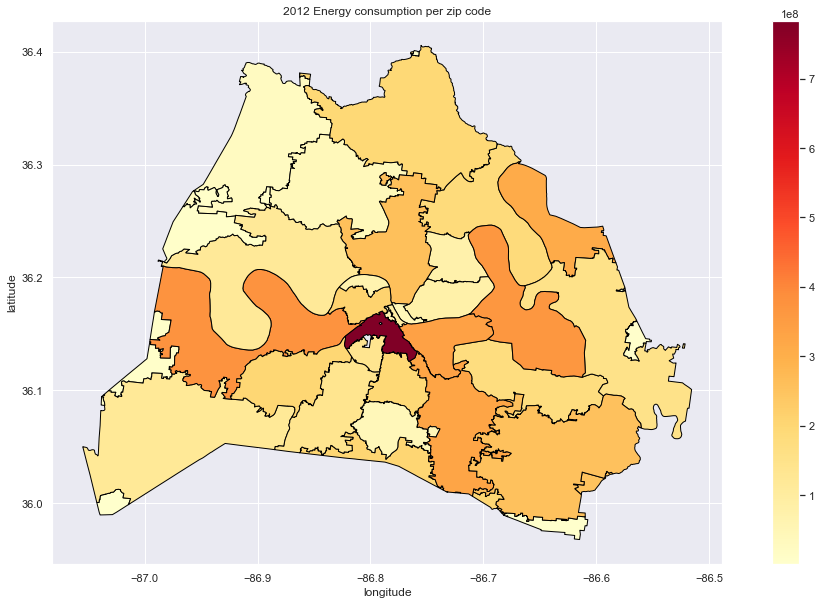

In [51]:
plt.rcParams['figure.figsize'] = (18,10)
year_2017.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('2012 Energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [45]:
# Create a DF for the year 2018
year_2018 = year_zip_geo.loc[year_zip_geo.year == 2018]

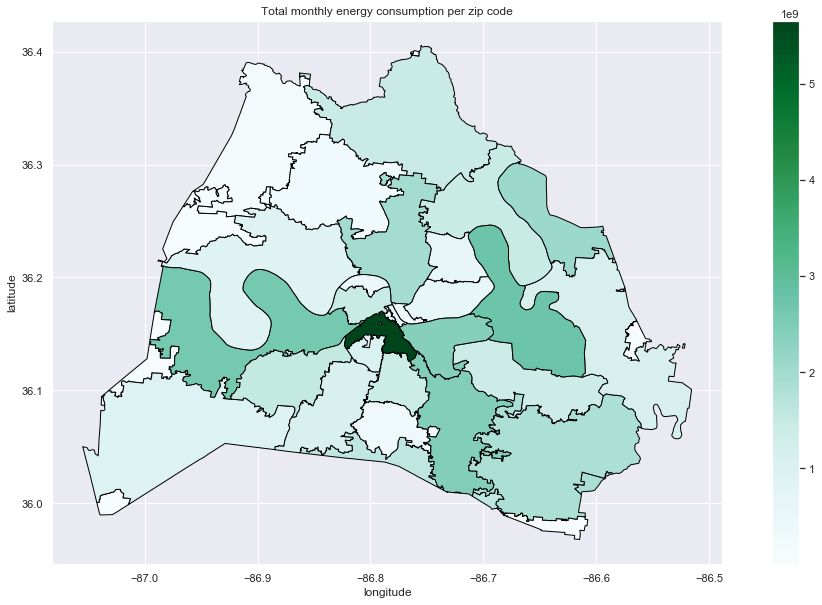

In [25]:
 #plot it
plt.rcParams['figure.figsize'] = (18,10)
nash_zip_geo.plot(column = 'monthly_usage', cmap = 'BuGn', 
                           edgecolor = 'black', legend = True)
plt.title('Total monthly energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

## Creating a folium map

In [26]:
# Center point for Nashville
nashville = [36.1636,-86.7823]

# Create map
m = folium.Map(location=nashville, zoom_start=10)


## Building a Chloropleth

In [27]:
# Building a choropleth
m.choropleth(
    geo_data=nash_zip_geo,
    name='geometry',
    data=nash_zip_geo,
    columns=['zip', 'monthly_usage'],
    key_on='feature.properties.zip',
    fill_color='YlGn',
    fill_opacity=0.75,
    line_opacity=0.5,
    legend_name='2012_2019 Monthly Energy Use in Nashville')

In [28]:
# Adding a layer control and displaying
folium.LayerControl().add_to(m)
display(m)

In [29]:
 m.save('mymap.html')

### Residential Chloropleth Map

In [30]:

residential_combine_df2 = energy_consumption_combine_df5.loc[energy_consumption_combine_df5.customer_type == 'residential']
residential_combine_df2.head()

year  month  zip_code customer_type  monthly_usage        lat  \
7550  2016.0      1   37206.0   residential      4032207.0  36.180950   
7551  2016.0      1   37015.0   residential       833727.0  36.290030   
7552  2016.0      1   37205.0   residential      7313534.0  36.112469   
7553  2016.0      1   37243.0   residential        16520.0  36.166899   
7554  2016.0      1   37204.0   residential      2167596.0  36.109305   

            lng                              geometry  \
7550 -86.739624   POINT (-86.73962400000001 36.18095)   
7551 -87.070106           POINT (-87.070106 36.29003)   
7552 -86.867263  POINT (-86.86726299999999 36.112469)   
7553 -86.776720           POINT (-86.77672 36.166899)   
7554 -86.776748          POINT (-86.776748 36.109305)   

                                 geometry2  
7550   POINT (-86.73962399999999 36.18095)  
7551   POINT (-87.07010600000001 36.29003)  
7552  POINT (-86.86726299999999 36.112469)  
7553           POINT (-86.77672 36.166899)  
7554          POINT (-86.776748 36.109305)

In [31]:
residential_zip_code_agg = residential_combine_df2.groupby('zip_code').monthly_usage.sum().reset_index().rename({'zip_code': 'zip'},axis=1)
residential_zip_code_agg.head()

zip  monthly_usage
0  37013.0    656822992.0
1  37015.0     59937360.0
2  37027.0    614736267.0
3  37064.0       529703.0
4  37066.0     38510846.0

In [32]:

residential_nash_zip_geo = nash_zip_df.merge(residential_zip_code_agg, on='zip' )
residential_nash_zip_geo.head()

objectid    po_name    shape_star     shape_stle      zip  \
0       1.0    MADISON  5.965534e+08  178783.024889  37115.0   
1       3.0  NASHVILLE  1.888847e+08   75820.997821  37216.0   
2       9.0  NASHVILLE  2.006648e+08   93180.292250  37204.0   
3      11.0  BRENTWOOD  1.749784e+08  159760.694293  37027.0   
4      31.0  BRENTWOOD  3.045961e+05    3116.432715  37027.0   

                                            geometry  monthly_usage  
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...    517132521.0  
1  POLYGON ((-86.73451 36.23774, -86.73425 36.237...    278753470.0  
2  POLYGON ((-86.77914 36.13424, -86.77923 36.133...    173870934.0  
3  POLYGON ((-86.81258 36.06319, -86.81263 36.063...    614736267.0  
4  POLYGON ((-86.72012 36.00886, -86.72012 36.008...    614736267.0

In [33]:
residential_nash_zip_geo['area'] = residential_nash_zip_geo.geometry.area
residential_nash_zip_geo.head(2)

objectid    po_name    shape_star     shape_stle      zip  \
0       1.0    MADISON  5.965534e+08  178783.024889  37115.0   
1       3.0  NASHVILLE  1.888847e+08   75820.997821  37216.0   

                                            geometry  monthly_usage      area  
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...    517132521.0  0.005558  
1  POLYGON ((-86.73451 36.23774, -86.73425 36.237...    278753470.0  0.001759

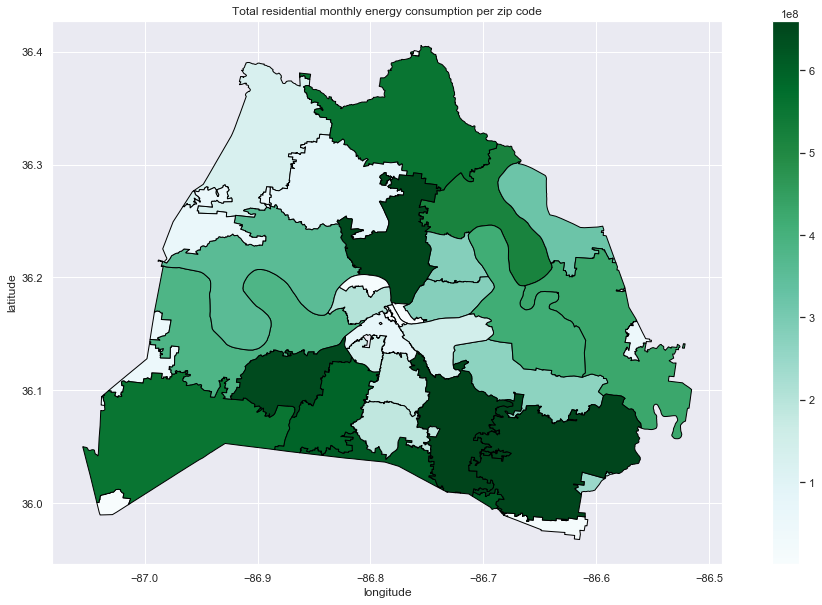

In [34]:
 #plot it
plt.rcParams['figure.figsize'] = (18,10)
residential_nash_zip_geo.plot(column = 'monthly_usage', cmap = 'BuGn', 
                           edgecolor = 'black', legend = True)
plt.title('Total residential monthly energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

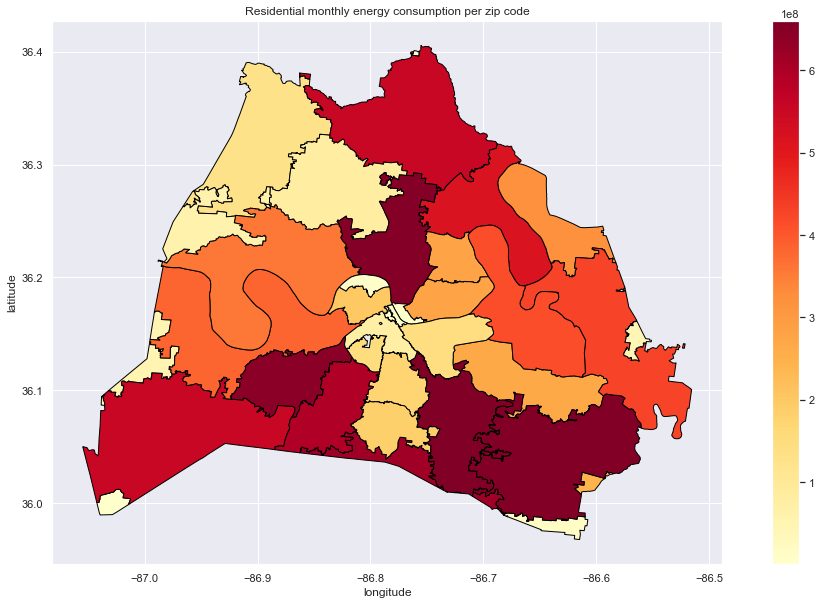

In [52]:
plt.rcParams['figure.figsize'] = (18,10)
residential_nash_zip_geo.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('Residential monthly energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [55]:
# Create a DF for the Residential
residential_df = energy_consumption_combine_df5.loc[energy_consumption_combine_df5.customer_type == 'residential']
residential_df.head(2)

year  month  zip_code customer_type  monthly_usage       lat  \
7550  2016.0      1   37206.0   residential      4032207.0  36.18095   
7551  2016.0      1   37015.0   residential       833727.0  36.29003   

            lng                             geometry  \
7550 -86.739624  POINT (-86.73962400000001 36.18095)   
7551 -87.070106          POINT (-87.070106 36.29003)   

                                geometry2  
7550  POINT (-86.73962399999999 36.18095)  
7551  POINT (-87.07010600000001 36.29003)

In [56]:
year_res_zip_code_agg = residential_df.groupby(['zip_code','year']).monthly_usage.sum().reset_index().rename({'zip_code': 'zip'},axis=1)
year_res_zip_code_agg.head(2)

zip    year  monthly_usage
0  37013.0  2012.0    106135451.0
1  37013.0  2013.0     94719260.0

In [57]:
year_res_nash_zip_geo = nash_zip_df.merge(year_res_zip_code_agg, on='zip' )
year_res_nash_zip_geo.head(2)

objectid  po_name    shape_star     shape_stle      zip  \
0       1.0  MADISON  5.965534e+08  178783.024889  37115.0   
1       1.0  MADISON  5.965534e+08  178783.024889  37115.0   

                                            geometry    year  monthly_usage  
0  POLYGON ((-86.68725 36.31821, -86.68722 36.318...  2012.0     71780059.0  
1  POLYGON ((-86.68725 36.31821, -86.68722 36.318...  2013.0     77621935.0

In [61]:
# Create a DF for the year 2012
year_res_2012 = year_res_nash_zip_geo.loc[year_res_nash_zip_geo.year == 2012]

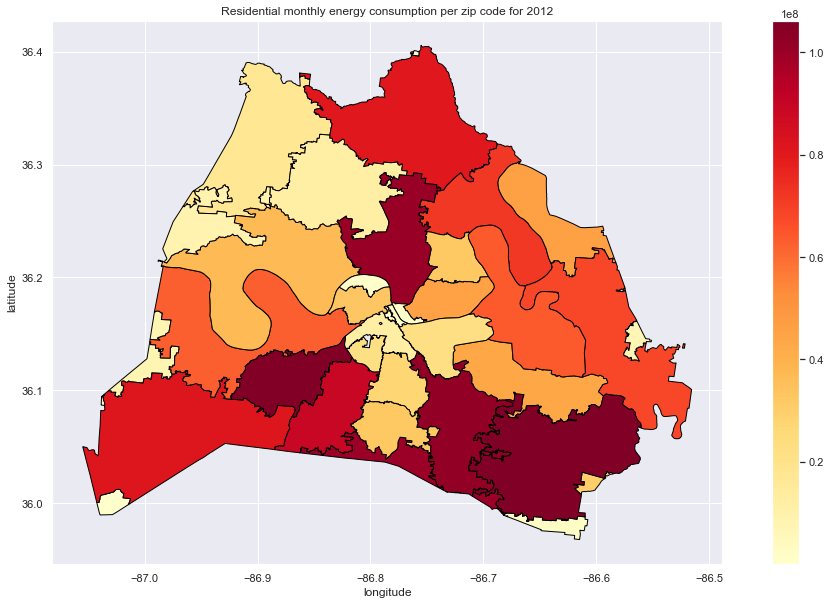

In [64]:
 #plot it
plt.rcParams['figure.figsize'] = (18,10)
year_res_2012.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('Residential monthly energy consumption per zip code for 2012')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [62]:
# Create a DF for the year 2015
year_res_2015 = year_res_nash_zip_geo.loc[year_res_nash_zip_geo.year == 2015]

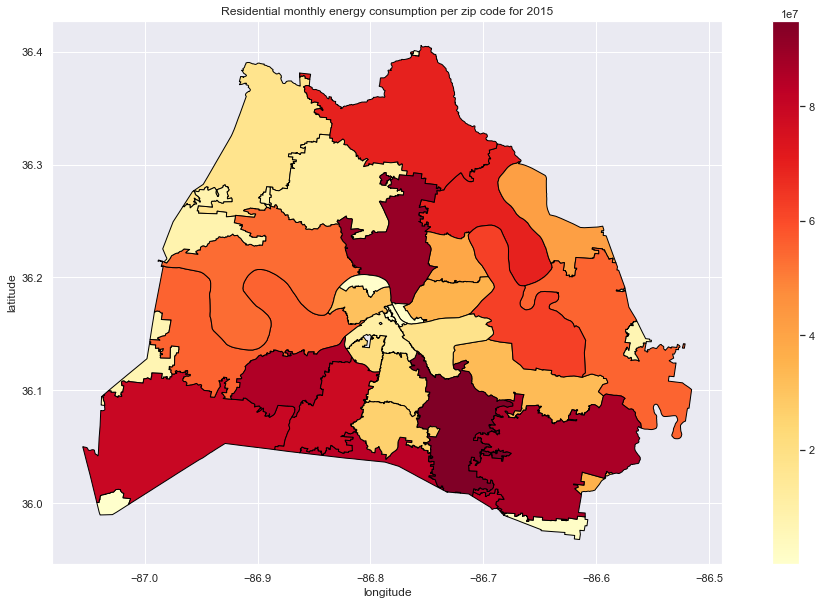

In [65]:
 #plot it
plt.rcParams['figure.figsize'] = (18,10)
year_res_2015.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('Residential monthly energy consumption per zip code for 2015')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [63]:
# Create a DF for the year 2018
year_res_2018 = year_res_nash_zip_geo.loc[year_res_nash_zip_geo.year == 2018]

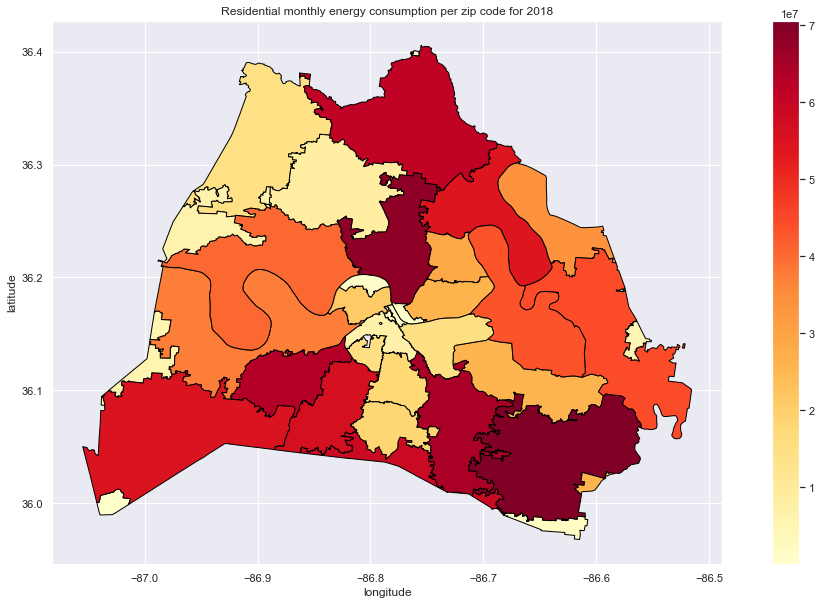

In [66]:
 #plot it
plt.rcParams['figure.figsize'] = (18,10)
year_res_2018.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('Residential monthly energy consumption per zip code for 2018')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [ ]:
 #plot it
plt.rcParams['figure.figsize'] = (18,10)
residential_2012.plot(column = 'monthly_usage', cmap = 'YlOrRd', 
                           edgecolor = 'black', legend = True)
plt.title('Total residential monthly energy consumption per zip code')
plt.xlabel('longitude')
plt.ylabel('latitude');

In [ ]:
plt.rcParams['figure.figsize'] = (16,8)
print('Percentage',energy_consumption_combine_df5.customer_type.value_counts(normalize=True))
energy_consumption_combine_df5.customer_type.value_counts(normalize=True).plot(kind='pie')

In [ ]:
plt.rcParams['figure.figsize'] = (16,6)
print('Percentage',energy_consumption_combine_df5.customer_type.value_counts(normalize=True))
energy_consumption_combine_df5.customer_type.value_counts(normalize=True).plot(kind='bar', color='blue','brown','green','red')

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = ‘monthly_usage’
# set the range for the choropleth
vmin, vmax = 1000000, 920000000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

In [ ]:
plt.rcParams['figure.figsize'] = (14,6)
# Create an array with the colors you want to use
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
print('Percentage',energy_consumption_combine_df5.customer_type.value_counts(normalize=True))
energy_consumption_combine_df5.customer_type.value_counts(normalize=True).plot(kind='bar')


In [ ]:
sns.palplot(sns.color_palette())

In [ ]:
energy_consumption_combine_df5['month'].value_counts()

In [ ]:
print('Parcentage',energy_consumption_combine_df5.month.value_counts(normalize=True))
energy_consumption_combine_df5.month.value_counts(normalize=True).plot(kind='bar')
palette = sns.color_palette("bright")

## Using Folium to Visualize Station Data

In [ ]:
nash_map = folium.Map([36.1627, -86.7816], zoom_start=12)
nash_map

for index, row in energy_consumption_combine_df5.iterrows():
    folium.CircleMarker([row['lat'], row['lng']],
                        radius=15,
                        popup=row['customer_type'],
                        fill_color="#3db7e4", # usage color
                       ).add_to(nash_map)

In [ ]:
def generateNashMap(default_location=[36.1627, -86.7816], default_zoom_start=12):
    Nash_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return Nash_map

In [ ]:
nash_map = generateNashMap()
nash_map

In [ ]:
from folium.plugins import HeatMap
df_copy = energy_consumption_combine_df5[energy_consumption_combine_df5.month>=1].copy()
df_copy['count'] = 1
nash_map = generateNashMap()
HeatMap(data=df_copy[['lat', 'lng', 'count']].groupby(['lat', 'lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(nash_map)

In [ ]:
nash_map

In [ ]:
nash_map.add_child(folium.ClickForMarker(popup='Potential Location'))

In [ ]:
energy_consumption_combine_df5.iloc[72]

In [ ]:
from folium.plugins import HeatMap
df_copy = energy_consumption_combine_df5[energy_consumption_combine_df5.monthly_usage>1].copy()
df_copy['count'] = 1
nash_map = generateNashMap()
HeatMap(data=df_copy[['lat', 'lng', 'count']].groupby(['lat', 'lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(nash_map)

In [ ]:
nash_map

In [ ]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='customer_type', data=energy_consumption_combine_df5, ax=axis1)
sns.countplot(x='month', data=energy_consumption_combine_df5, ax=axis2)

In [ ]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='year', hue='customer_type', data=energy_consumption_combine_df5, ax=axis1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
sns.countplot(x='month', hue='customer_type', data=energy_consumption_combine_df5, ax=axis2)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='customer_type', y='monthly_usage', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[0,0])
plt.xticks(rotation=90)
sns.barplot(x='customer_type', y='year', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[0,1])
plt.xticks(rotation=90)
sns.barplot(x='customer_type', y='month', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[1,0])
plt.xticks(rotation=90)
sns.barplot(x='customer_type', y='zip_code', data=energy_consumption_combine_df5, order=['commercial','residential','outdoor_lighting','seasonal'], ax=axarr[1,1])
plt.xticks(rotation=90)

In [ ]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.swarmplot(x='customer_type', y='monthly_usage', data=energy_consumption_combine_df5, ax=axis1)
sns.swarmplot(x='year', y='monthly_usage', data=energy_consumption_combine_df5, ax=axis2)


In [ ]:
commercial_combine_df = energy_consumption_combine_df5.loc[ energy_consumption_combine_df5.customer_type == 'commercial']
commercial_combine_df.head()

In [ ]:
comm_median_zip_year = commercial_combine_df.groupby(['year', commercial_combine_df['zip_code'], commercial_combine_df['customer_type']]).agg({'monthly_usage':sum}).reset_index()

In [ ]:
sns.distplot(commercial_combine_df['monthly_usage'], kde=False)

In [ ]:
sns.distplot(energy_consumption_combine_df5['monthly_usage'], kde=False, bins=30)

In [ ]:
sns.jointplot(x='month', y='monthly_usage', data=energy_consumption_combine_df5)

In [ ]:
sns.pairplot(energy_consumption_combine_df5, hue='customer_type', palette='coolwarm')

In [ ]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [ ]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = energy_consumption_combine_df5['zip_code'],
        locationmode = "country names",
        z = energy_consumption_combine_df5['monthly_usage'],
        text = energy_consumption_combine_df5['zip_code'],
        colorbar = {'title' : 'Power Consumption KWH'},
      ) 

layout = dict(title = '2012-2019 Power Consumption KWH',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

In [ ]:
choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

In [ ]:
# top 5 zip code with the highest energy consumption
energy_consumption_combine_df5['zip_code'].value_counts().head(5)

In [ ]:
# Most Frequent Customer Type
energy_consumption_combine_df5['customer_type'].value_counts().head(5)

In [ ]:
energy_consumption_combine_df5['zip_code'].nunique()

In [ ]:
avg_per_zip = pd.read_csv('data/zip_pop.csv')

In [ ]:
avg_per_zip.head(2)

In [ ]:
del avg_per_zip['National Rank.1']

In [ ]:
Avg_income_zip = avg_per_zip[['zip_code.1', 'Population', 'National Rank', 'Avg Income']]

In [ ]:
Avg_income_zip.head(2)

In [ ]:
Avg_income_zip2 = Avg_income_zip[:21]

In [ ]:
Avg_income_zip2.head(2)

In [ ]:
Avg_income_zip2 = Avg_income_zip2.rename(columns={'zip_code.1': 'zip_code', 'Population': 'population', 'National Rank': 'national_rank', 'Avg Income': 'avg_income'})
